# Import

In [263]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

sns.set(style="whitegrid", font="Source Sans Pro", font_scale=1.4)

from vpython import vector

# Constants

Data from https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html

<table>
<tbody><tr>
  <td align="center">&nbsp;</td>
  <th align="center">&nbsp;<br>&nbsp;&nbsp; Mercury &nbsp;&nbsp;</th>
  <th align="center">&nbsp;<br>&nbsp;&nbsp; Earth &nbsp;&nbsp;</th>
  <th align="center">Ratio<br>(Mercury/Earth)</th>
</tr>

<tr>
  <th align="left">Semimajor axis (10<sup>6</sup> km)</th>
  <td align="center">57.91</td>
  <td align="center">149.60</td>
  <td align="center">0.387</td>
</tr>     
<tr>
  <th align="left">Sidereal orbit period (days)</th>
  <td align="center">87.969</td>
  <td align="center">365.256</td>
  <td align="center">0.241</td>
</tr>
<tr>
  <th align="left">Tropical orbit period (days)</th>
  <td align="center">87.968</td>
  <td align="center">365.242</td>
  <td align="center">0.241</td>
</tr>
<tr>
  <th align="left">Perihelion (10<sup>6</sup> km)</th>
  <td align="center">46.00</td>
  <td align="center">147.09</td>
  <td align="center">0.313</td>
</tr>
<tr>
  <th align="left">Aphelion (10<sup>6</sup> km)</th>
  <td align="center">69.82</td>
  <td align="center">152.10</td>
  <td align="center">0.459</td>
</tr>
<tr>
  <th align="left">Synodic period (days)</th>
  <td align="center">115.88</td>
  <td align="center"> - </td>
  <td align="center"> - </td>
</tr>
<tr>
  <th align="left">Mean orbital velocity (km/s)</th>
  <td align="center">47.36</td>
  <td align="center">29.78</td>
  <td align="center">1.590</td>
</tr>
<tr>
  <th align="left">Max. orbital velocity (km/s)</th>
  <td align="center">58.98</td>
  <td align="center">30.29</td>
  <td align="center">1.947</td>
</tr>
<tr>
  <th align="left">Min. orbital velocity (km/s)</th>
  <td align="center">38.86</td>
  <td align="center">29.29</td>
  <td align="center">1.327</td>
</tr>
<tr>
  <th align="left">Orbit inclination (deg)</th>
  <td align="center">7.00</td>
  <td align="center">0.00</td>
  <td align="center"> - </td>
</tr>
<tr>
  <th align="left">Orbit eccentricity</th>
  <td align="center">0.2056</td>
  <td align="center">0.0167</td>
  <td align="center">12.311</td>
</tr>
<tr>
  <th align="left">Sidereal rotation period (hrs)</th>
  <td align="center">1407.6</td>
  <td align="center">23.9345</td>
  <td align="center">58.785</td>
</tr>
<tr>
  <th align="left">Length of day (hrs)</th>
  <td align="center">4222.6</td>
  <td align="center">24.0000</td>
  <td align="center">175.942</td>
</tr>
<tr>
  <th align="left">Obliquity to orbit (deg)</th>
  <td align="center">0.034</td>
  <td align="center">23.44</td>
  <td align="center">0.001</td>
</tr>
<tr>
  <th align="left">Inclination of equator (deg)</th>
  <td align="center">0.034</td>
  <td align="center">23.44</td>
  <td align="center">0.001</td>
</tr>
</tbody></table>

In [264]:
R0 = 1e10
T0 = 24*60*60

In [265]:
rA = 69816900000./R0
rP = 46001200000./R0
vA = 38.86e3/R0*T0
vP = 69.82e3/R0*T0

In [269]:
rA/rP

1.5177191029799222

In [266]:
aM  =0.99 
LdM = 2.71221*1e15 * T0 / R0**2

# Simulation

In [267]:
rm = vector(rP,0,0)
vm = vector(0,vP,0)

xN = []
yN = []
nt = 0
dt = 0.1
v = vm

NTmax=1000

while nt<NTmax:
    nt += 1
    r=-rm

    #Beschleunigung
    a=1./(r.mag)**3*r*(aM) 
    #a=1./(r.mag)**3*r*(c22rS+1.*c22rS2/(r.mag)) 

    #Geschwindigkeiten
    v=v+a*dt

    #Positionen
    rm=rm+v*dt

    xN.append(rm.x)
    yN.append(rm.y)

    t=t+dt


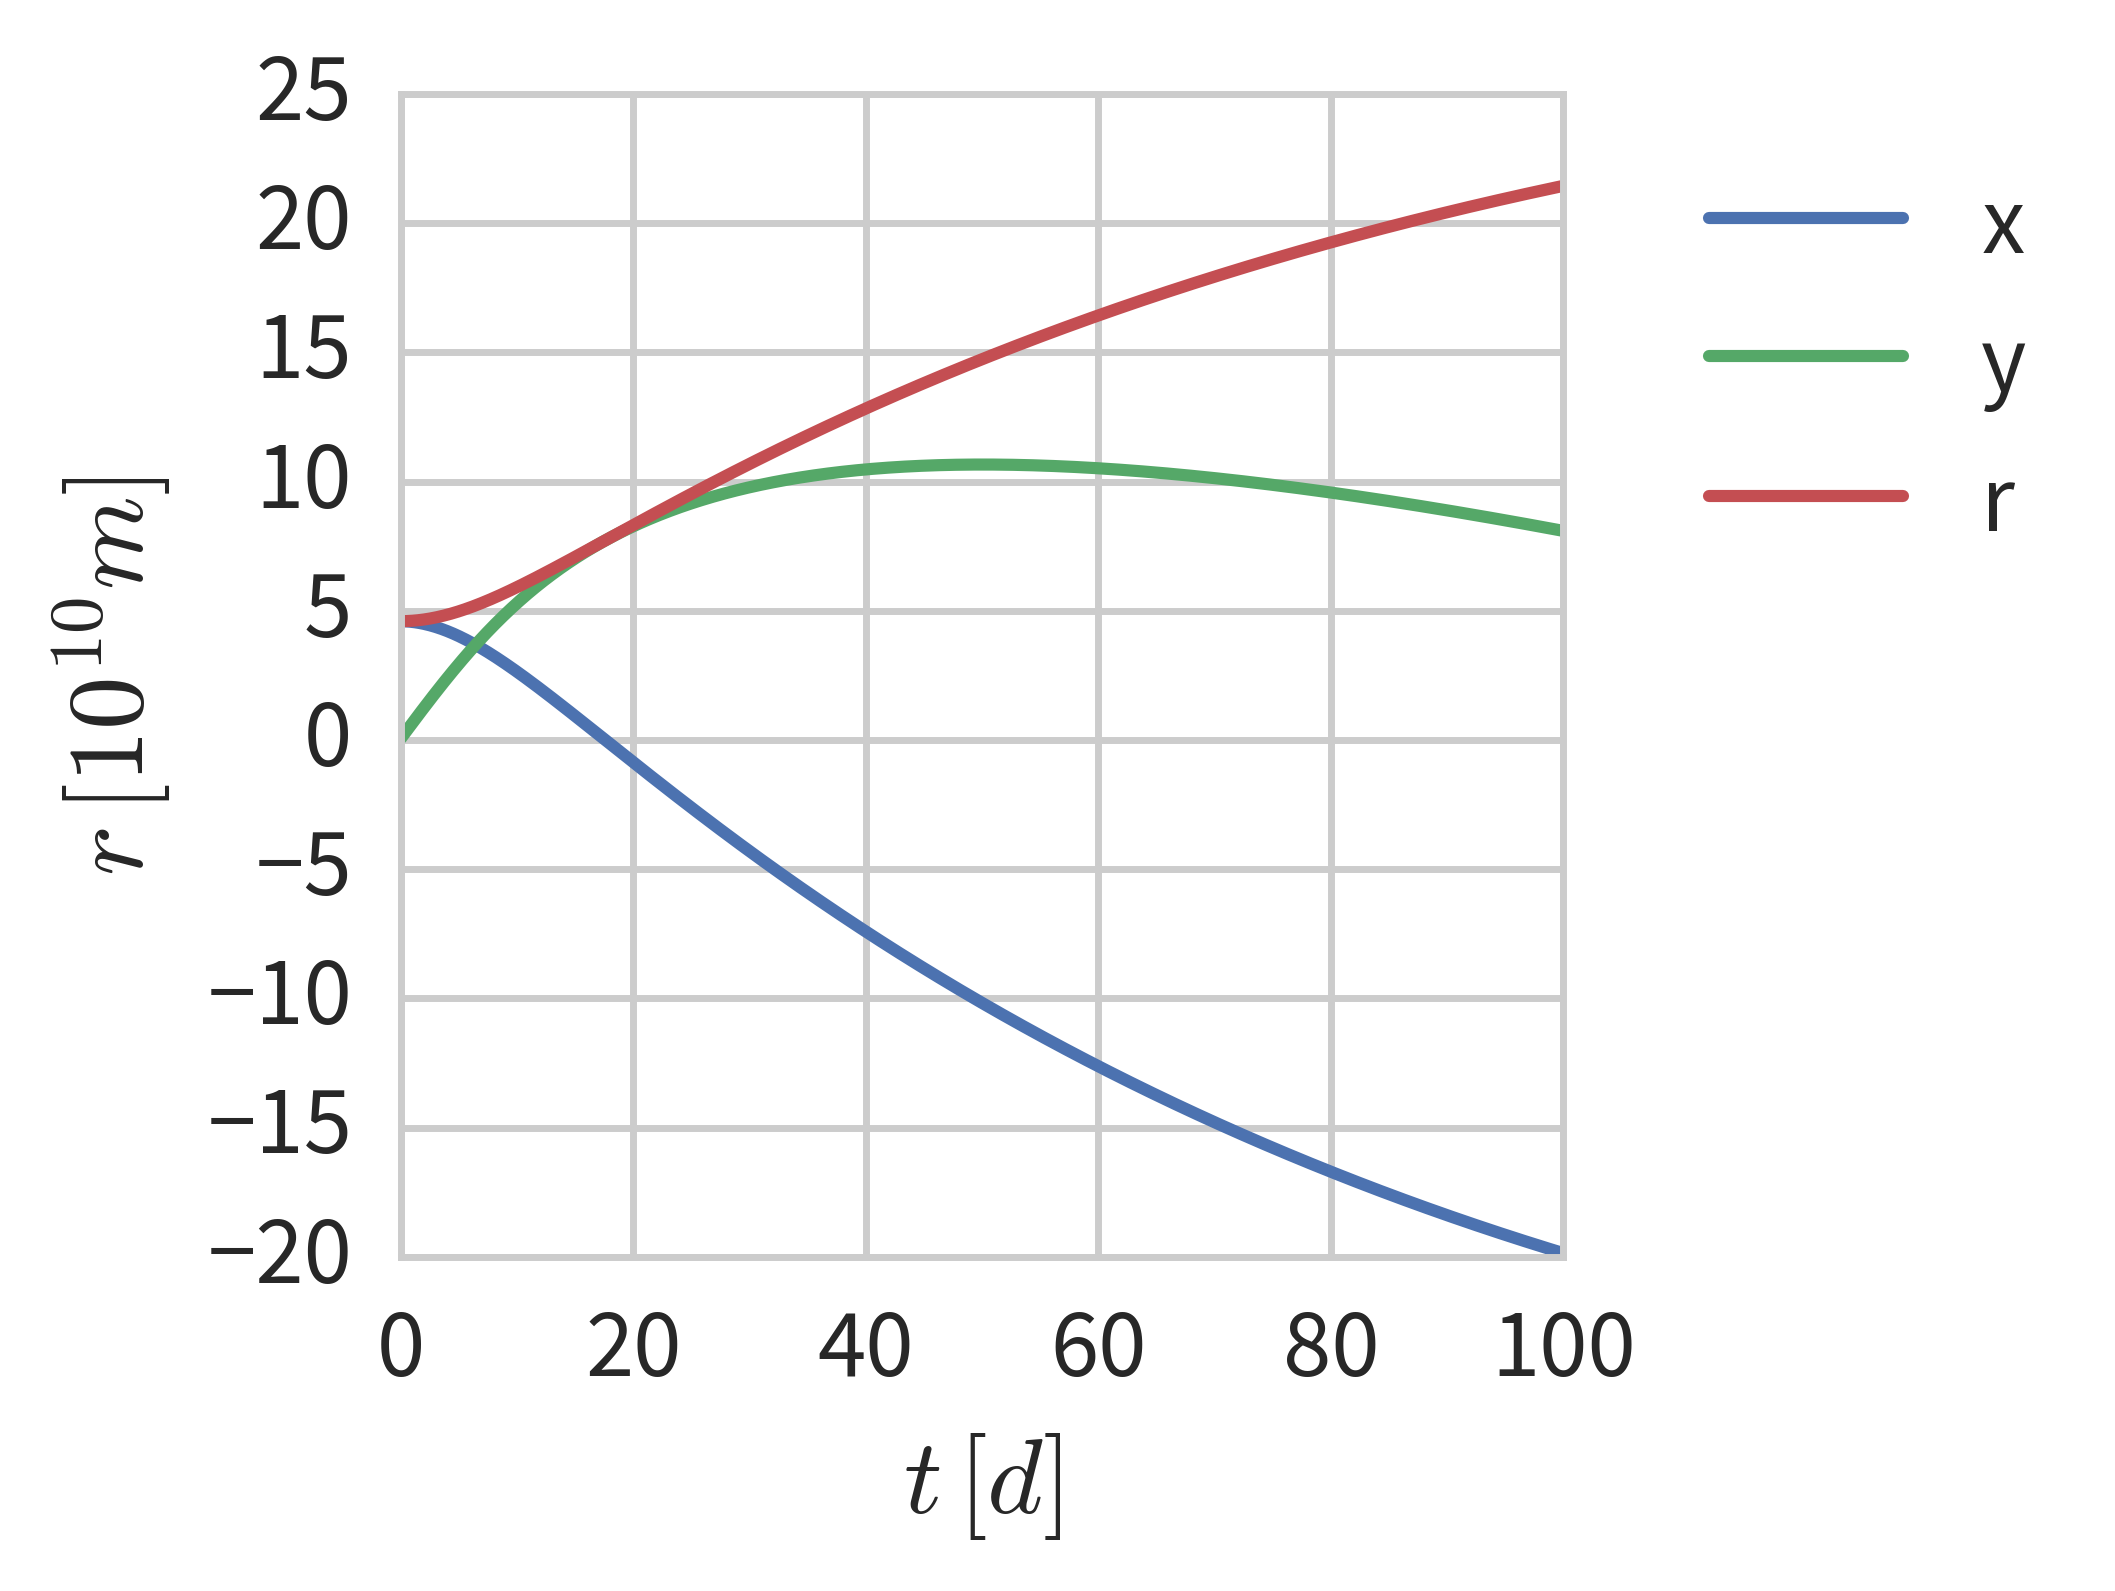

In [268]:
fig = plt.figure(figsize=(3,3), dpi=500)

trange = np.linspace(0,NTmax*dt, NTmax)

plt.plot(trange, xN, label="x")
plt.plot(trange, yN, label="y")

plt.plot(trange, np.sqrt(np.array(xN)**2+np.array(yN)**2),label="r")

plt.legend(loc="upper left", bbox_to_anchor=(1.05,1.))

plt.xlabel("$t \, [d]$")

plt.ylabel("$r \, [10^{10}m]$")

plt.show()

# Compare to Analytic

Solutions to the Runge-Lenz vector for mercury result in
$$
    \frac{1}{r(t)} = \frac{m_M k}{L^2}\left(
        1 + \frac{A}{m_M k} \cos(\theta)
    \right)
$$
with
$k = G_N m_M m_S$, $L$ the angular momentum and $A$ the absoulte of the Runge-Lenz vector
solving for $k$ and $L$ by requiring that $r(0) = r_P$ and $r(\pi) = r_A$, one finds
$$
    r(t) = \frac{5.54604 R_0}{ 1 + 0.20563 \cos(\theta)}
$$

In [257]:
def get_xyA(theta):
    xA = 5.54604*np.cos(theta)/(1+0.20563*np.cos(theta))# + rA/3
    yA = 5.54604*np.sin(theta)/(1+0.20563*np.cos(theta))
    return xA, yA

## Orbit

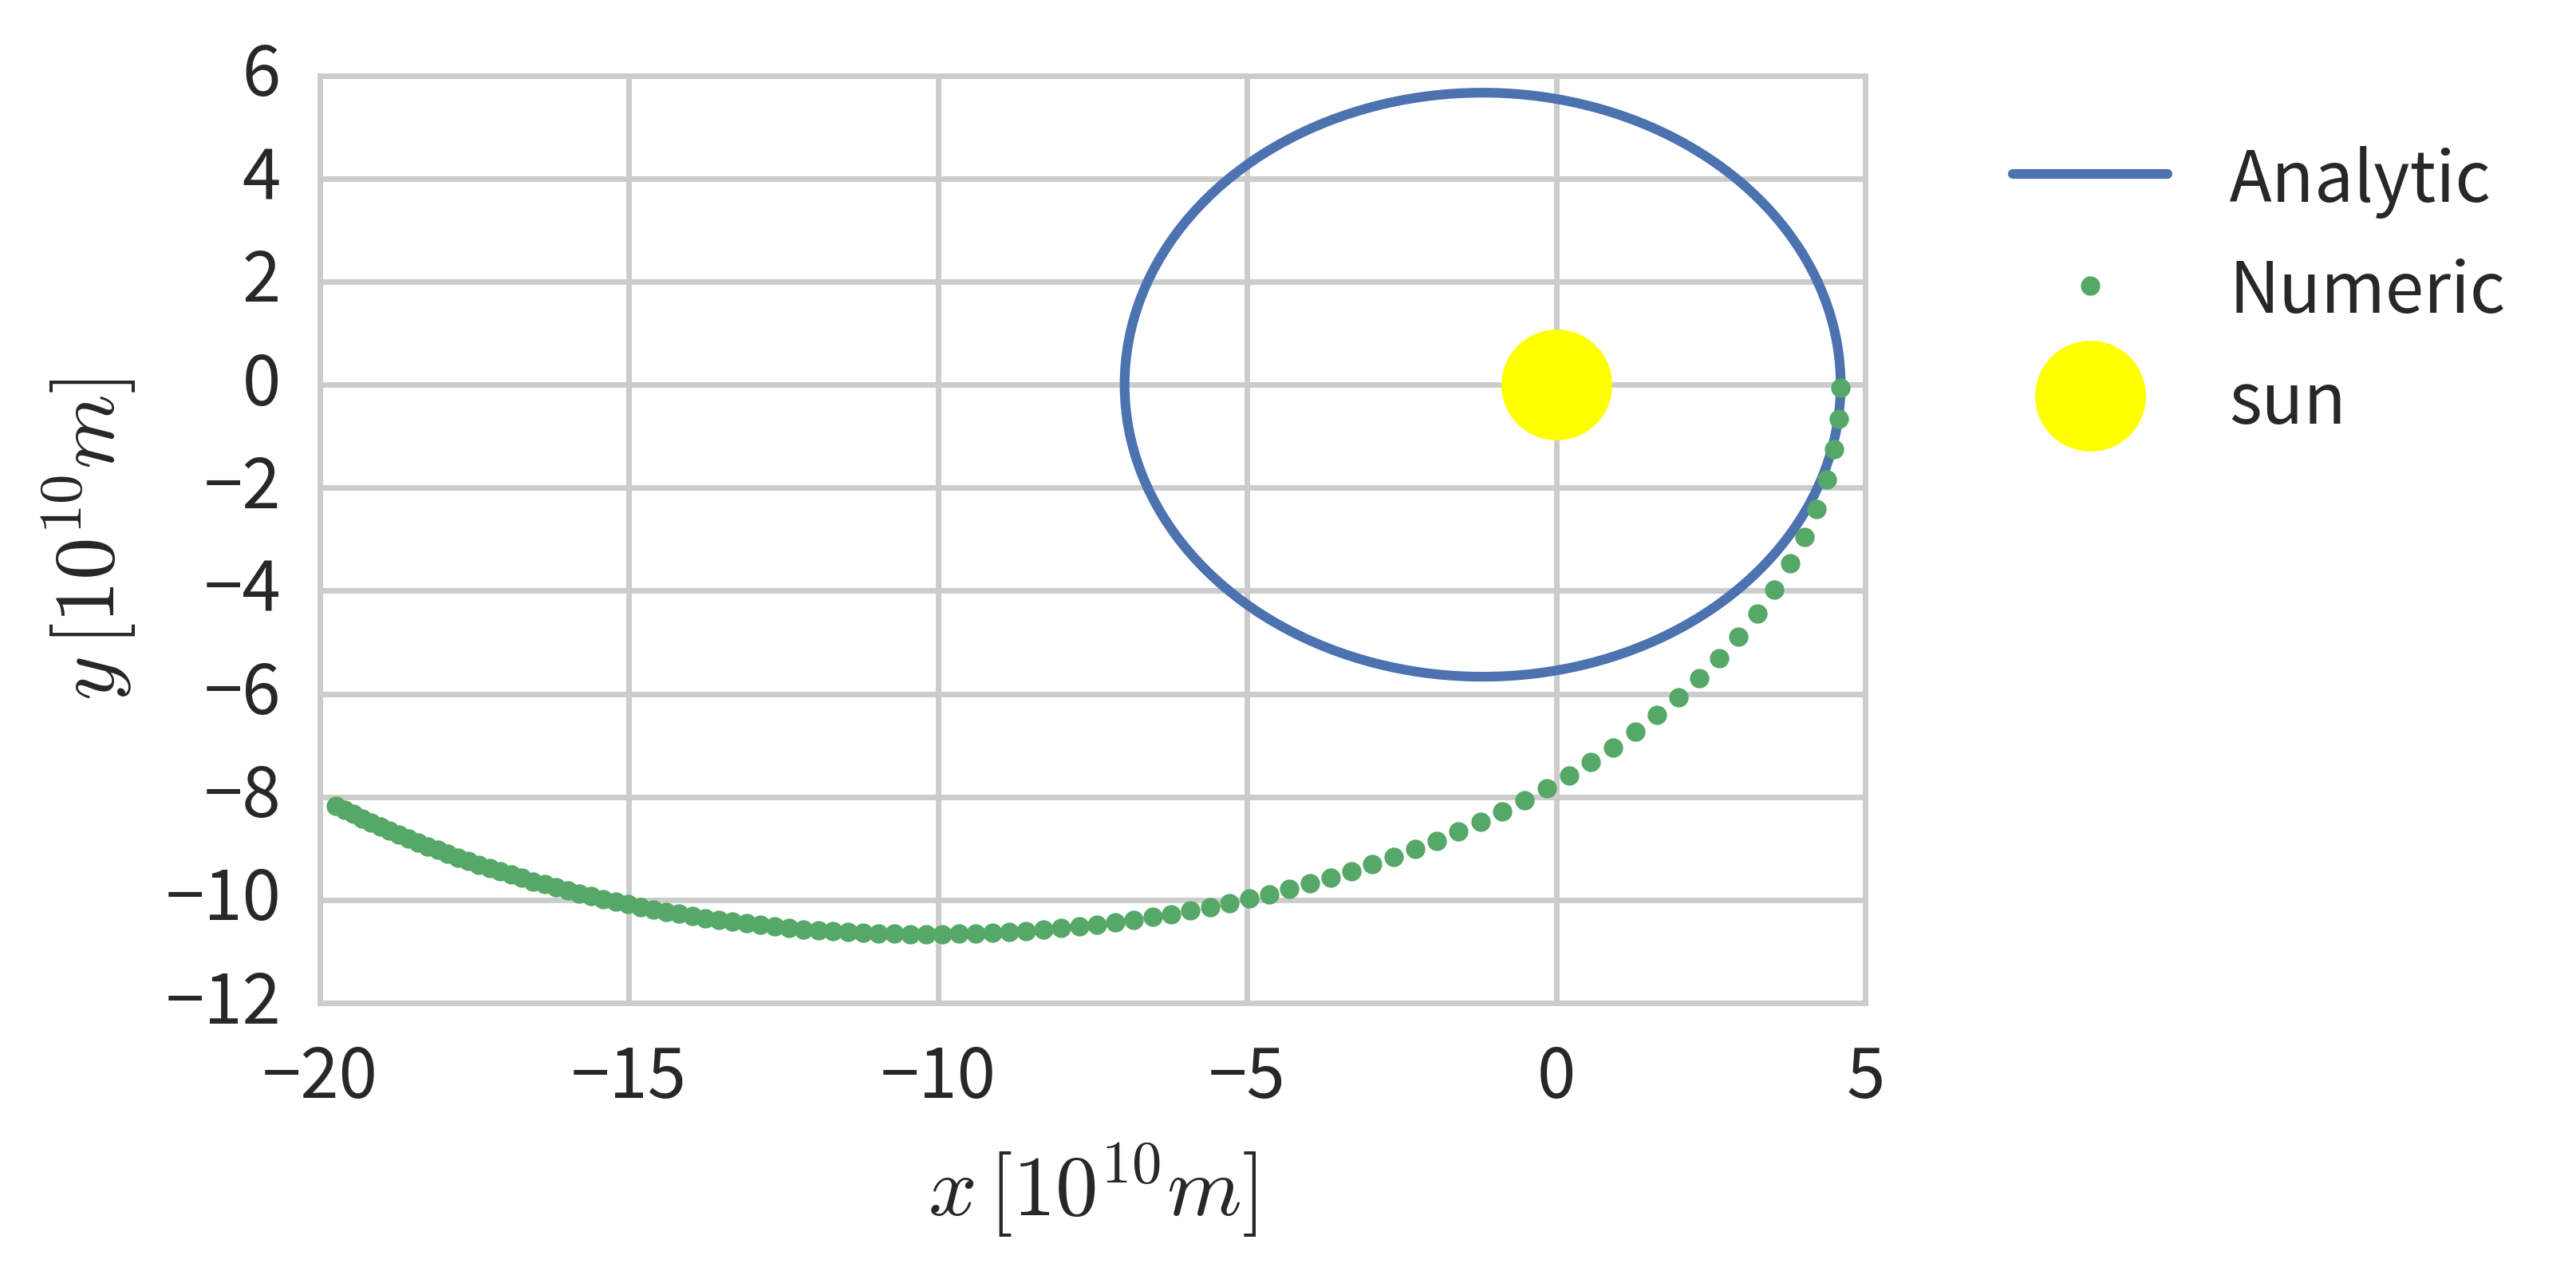

In [258]:
fig = plt.figure(figsize=(5,3), dpi=500)

xAR = []
yAR = []

for theta in np.linspace(0,2*np.pi,200):
    xA, yA = get_xyA(theta)
    yAR += [yA]
    xAR += [xA]

plt.plot(xAR,yAR, label="Analytic")

plt.plot(xN[::10],yN[::10], label="Numeric", linestyle="None", marker=".")

plt.plot(0,0, marker="o", markersize=20, color="yellow", label="sun", linestyle="None")

plt.ylabel(r"$y \, [10^{10}m]$")
plt.xlabel(r"$x \, [10^{10}m]$")

plt.legend(loc="upper left", bbox_to_anchor=(1.05,1.))

plt.show()

## Error Analysis

### Angle

The anlge $\theta(t)$ can be computed according to
$$
    \theta(t) 
    = \int _{0}^{t} d \tau \frac{d \theta(\tau)}{d \tau}
    = \int _{0}^{t} d \tau \frac{L}{m r^2(\tau)}
$$

In [248]:
ex = []
ey = []
er = []
xAR = []
yAR = []

theta = 0
thrange = []
for x, y in zip(xN, yN):
    theta += LdM /(x**2 + y**2)*dt       
    thrange +=[theta]
    xA, yA = get_xyA(theta)
    xAR += [xA]
    yAR += [yA]
    ex += [np.sqrt( (x-xA)**2 )]
    ey += [np.sqrt( (y-yA)**2 )]
    er += [np.sqrt( (x-xA)**2 + (y-yA)**2 )]

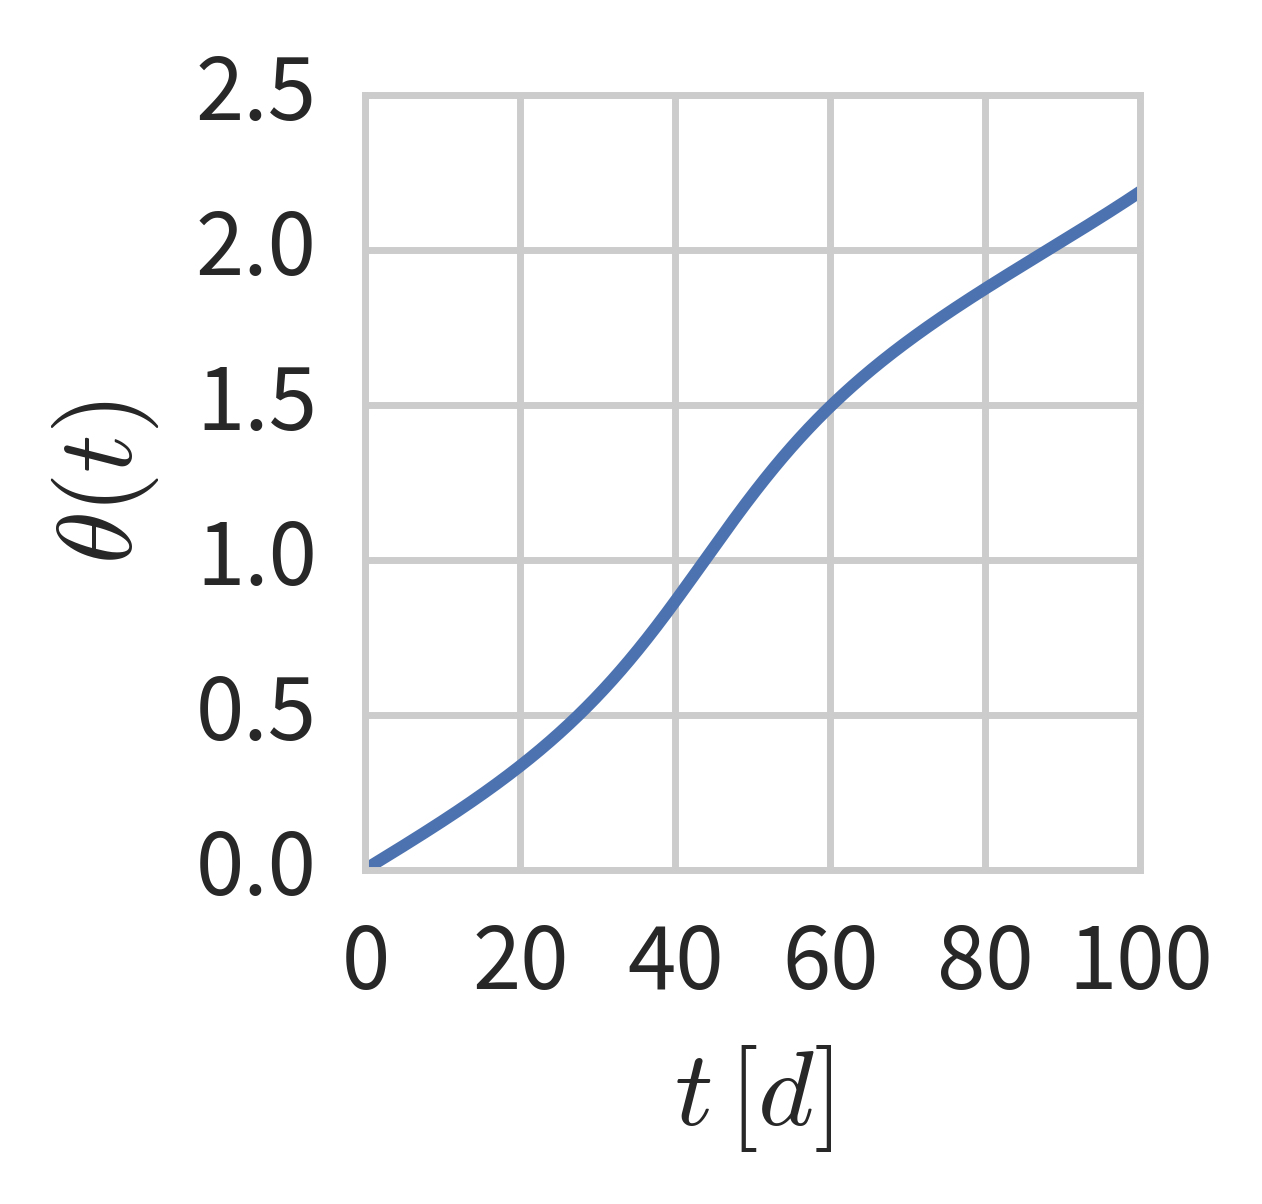

In [249]:
fig = plt.figure(figsize=(2,2), dpi=500)

plt.plot(trange, np.array(thrange)/np.pi, label="$\Delta r$")
plt.ylabel(r"$\theta(t)$")

plt.xlabel("$t \, [d]$")

plt.show()

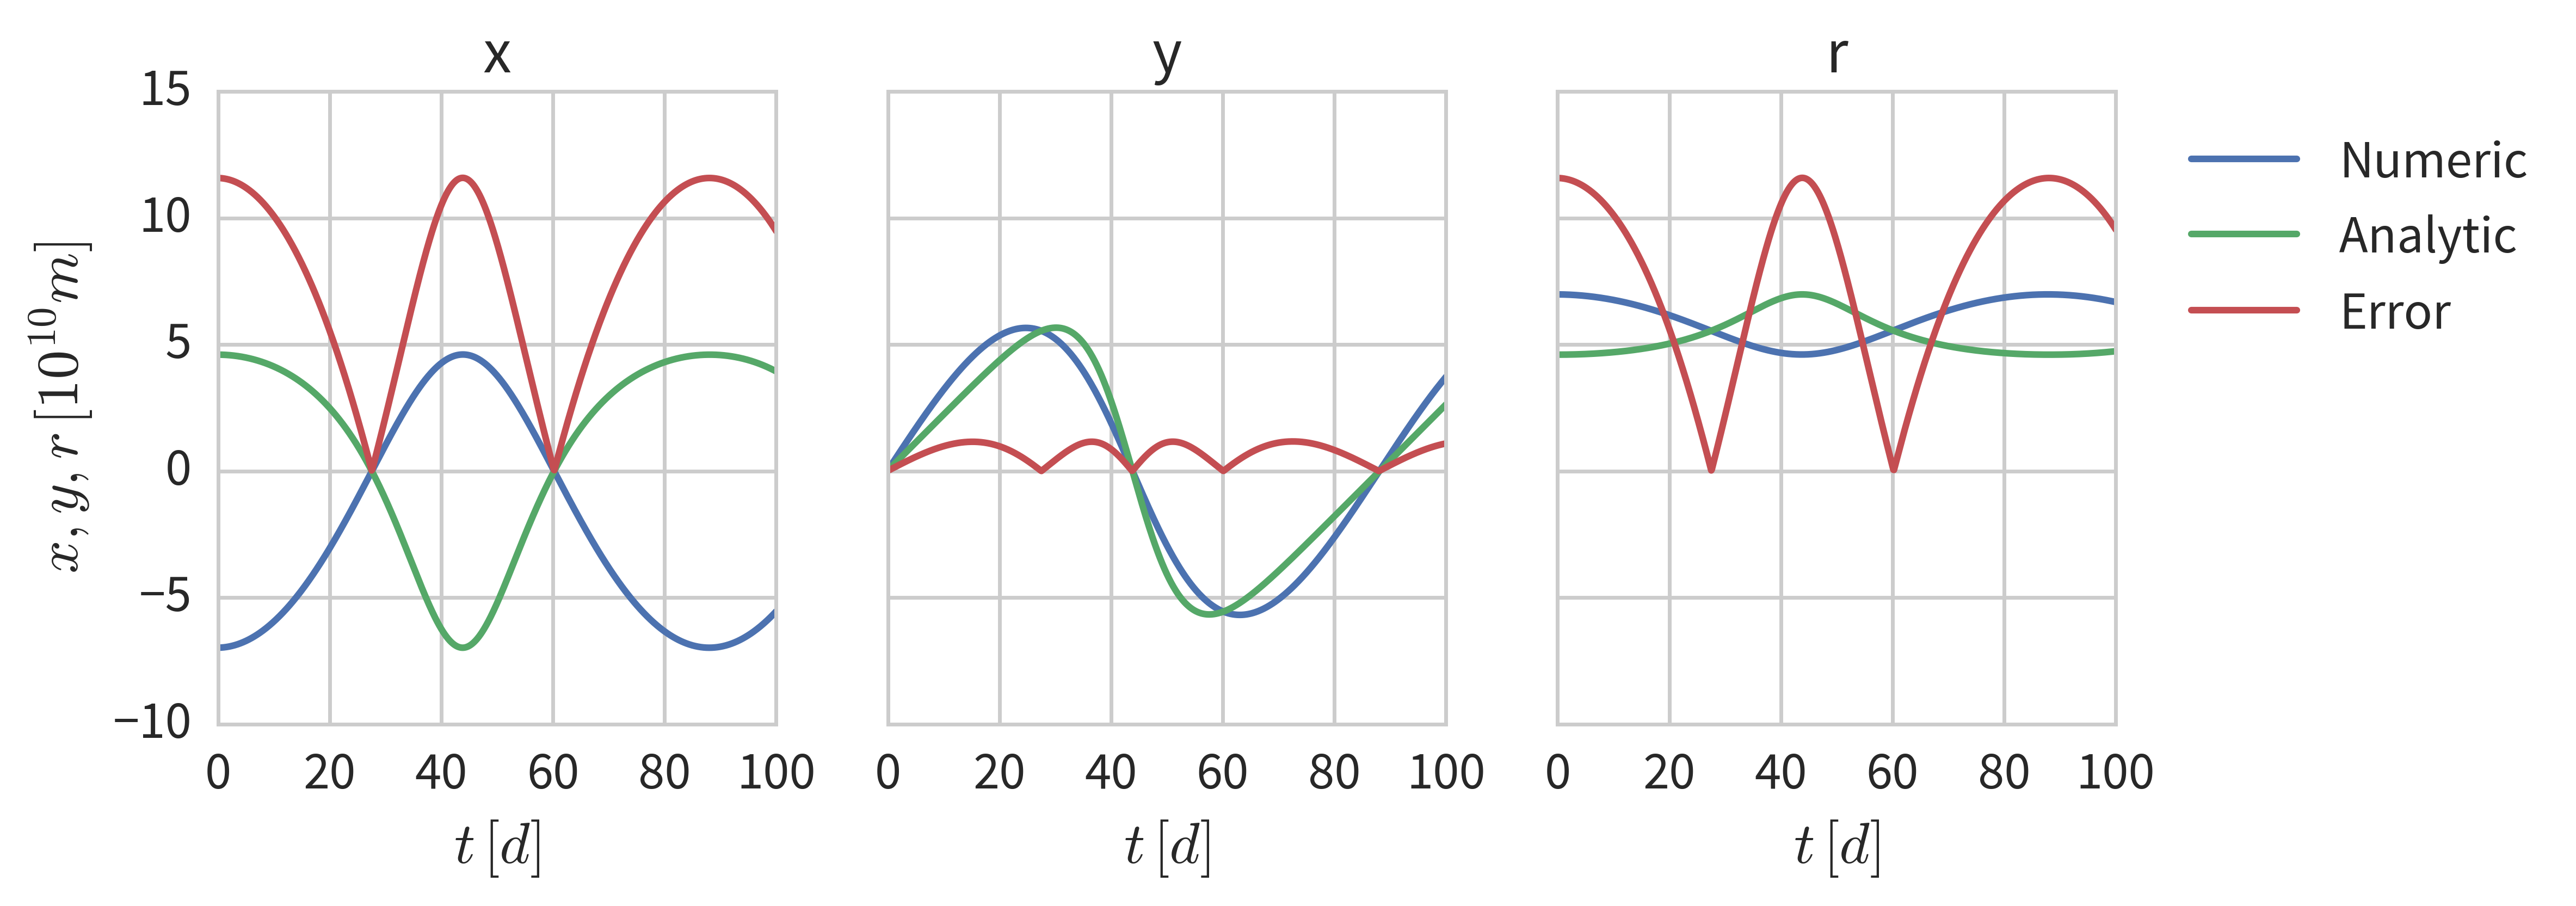

In [250]:
fig, axs = plt.subplots(1,3,sharey=True,figsize=(9,3), dpi=500)

axs[0].set_title("x")
axs[0].plot(trange, xN, label="$x_N$")
axs[0].plot(trange, xAR, label="$x_A$")
axs[0].plot(trange, ex, label="$\Delta x$")

axs[1].set_title("y")
axs[1].plot(trange, yN, label="$y_N$")
axs[1].plot(trange, yAR, label="$y_A$")
axs[1].plot(trange, ey, label="$\Delta y$")

axs[2].set_title("r")
axs[2].plot(trange, np.sqrt(np.array(xN)**2 + np.array(yN)**2), label="Numeric")
axs[2].plot(trange, np.sqrt(np.array(xAR)**2 + np.array(yAR)**2), label="Analytic")
axs[2].plot(trange, er, label="Error")

axs[-1].legend(loc="upper left", bbox_to_anchor=(1.05,1.))

for ax in axs:
    ax.set_xlabel("$t \, [d]$")

axs[0].set_ylabel("$x,y,r \, [10^{10}m]$")

plt.show()

# Venus Orbit

<table role="presentation" border="2" cellspacing="1" cellpadding="4">
<tbody><tr>
  <td align="left"><b>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="mercuryfact.html">MERCURY</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="venusfact.html">VENUS</a>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="earthfact.html">EARTH</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="moonfact.html">MOON</a>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="marsfact.html">MARS</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="jupiterfact.html">JUPITER</a>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="saturnfact.html">SATURN</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="uranusfact.html">URANUS</a>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="neptunefact.html">NEPTUNE</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="plutofact.html">PLUTO</a>&nbsp;</b></td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#mass">Mass</a> (10<sup>24</sup>kg)</b></td>
  <td align="center" bgcolor="F5F5F5">0.330</td>
  <td align="center" bgcolor="FFFFFF">4.87</td>
  <td align="center" bgcolor="F5F5F5">5.97</td>
  <td align="center" bgcolor="FFFFFF">0.073</td>
  <td align="center" bgcolor="F5F5F5">0.642</td>
  <td align="center" bgcolor="FFFFFF">1898</td>
  <td align="center" bgcolor="F5F5F5">568</td>
  <td align="center" bgcolor="FFFFFF">86.8</td>
  <td align="center" bgcolor="F5F5F5">102</td>
  <td align="center" bgcolor="FFFFFF">0.0146</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#diam">Diameter</a> (km)</b></td>
  <td align="center" bgcolor="F5F5F5">4879</td>
  <td align="center" bgcolor="FFFFFF">12,104</td>
  <td align="center" bgcolor="F5F5F5">12,756</td>
  <td align="center" bgcolor="FFFFFF">3475</td>
  <td align="center" bgcolor="F5F5F5">6792</td>
  <td align="center" bgcolor="FFFFFF">142,984</td>
  <td align="center" bgcolor="F5F5F5">120,536</td>
  <td align="center" bgcolor="FFFFFF">51,118</td>
  <td align="center" bgcolor="F5F5F5">49,528</td>
  <td align="center" bgcolor="FFFFFF">2370</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#dens">Density</a> (kg/m<sup>3</sup>)</b></td>
  <td align="center" bgcolor="F5F5F5">5427</td>
  <td align="center" bgcolor="FFFFFF">5243</td>
  <td align="center" bgcolor="F5F5F5">5514</td>
  <td align="center" bgcolor="FFFFFF">3340</td>
  <td align="center" bgcolor="F5F5F5">3933</td>
  <td align="center" bgcolor="FFFFFF">1326</td>
  <td align="center" bgcolor="F5F5F5">687</td>
  <td align="center" bgcolor="FFFFFF">1271</td>
  <td align="center" bgcolor="F5F5F5">1638</td>
  <td align="center" bgcolor="FFFFFF">2095</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#grav">Gravity</a> (m/s<sup>2</sup>)</b></td>
  <td align="center" bgcolor="F5F5F5">3.7</td>
  <td align="center" bgcolor="FFFFFF">8.9</td>
  <td align="center" bgcolor="F5F5F5">9.8</td>
  <td align="center" bgcolor="FFFFFF">1.6</td>
  <td align="center" bgcolor="F5F5F5">3.7</td>
  <td align="center" bgcolor="FFFFFF">23.1</td>
  <td align="center" bgcolor="F5F5F5">9.0</td>
  <td align="center" bgcolor="FFFFFF">8.7</td>
  <td align="center" bgcolor="F5F5F5">11.0</td>
  <td align="center" bgcolor="FFFFFF">0.7</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#escv">Escape Velocity</a> (km/s)</b></td>
  <td align="center" bgcolor="F5F5F5">4.3</td>
  <td align="center" bgcolor="FFFFFF">10.4</td>
  <td align="center" bgcolor="F5F5F5">11.2</td>
  <td align="center" bgcolor="FFFFFF">2.4</td>
  <td align="center" bgcolor="F5F5F5">5.0</td>
  <td align="center" bgcolor="FFFFFF">59.5</td>
  <td align="center" bgcolor="F5F5F5">35.5</td>
  <td align="center" bgcolor="FFFFFF">21.3</td>
  <td align="center" bgcolor="F5F5F5">23.5</td>
  <td align="center" bgcolor="FFFFFF">1.3</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#rotp">Rotation Period</a> (hours)</b></td>
  <td align="center" bgcolor="F5F5F5">1407.6</td>
  <td align="center" bgcolor="FFFFFF">-5832.5</td>
  <td align="center" bgcolor="F5F5F5">23.9</td>
  <td align="center" bgcolor="FFFFFF">655.7</td>
  <td align="center" bgcolor="F5F5F5">24.6</td>
  <td align="center" bgcolor="FFFFFF">9.9</td>
  <td align="center" bgcolor="F5F5F5">10.7</td>
  <td align="center" bgcolor="FFFFFF">-17.2</td>
  <td align="center" bgcolor="F5F5F5">16.1</td>
  <td align="center" bgcolor="FFFFFF">-153.3</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#leng">Length of Day</a> (hours)</b></td>
  <td align="center" bgcolor="F5F5F5">4222.6</td>
  <td align="center" bgcolor="FFFFFF">2802.0</td>
  <td align="center" bgcolor="F5F5F5">24.0</td>
  <td align="center" bgcolor="FFFFFF">708.7</td>
  <td align="center" bgcolor="F5F5F5">24.7</td>
  <td align="center" bgcolor="FFFFFF">9.9</td>
  <td align="center" bgcolor="F5F5F5">10.7</td>
  <td align="center" bgcolor="FFFFFF">17.2</td>
  <td align="center" bgcolor="F5F5F5">16.1</td>
  <td align="center" bgcolor="FFFFFF">153.3</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#dist">Distance from Sun</a> (10<sup>6</sup> km)</b></td>
  <td align="center" bgcolor="F5F5F5">57.9</td>
  <td align="center" bgcolor="FFFFFF">108.2</td>
  <td align="center" bgcolor="F5F5F5">149.6</td>
  <td align="center" bgcolor="FFFFFF">0.384*</td>
  <td align="center" bgcolor="F5F5F5">227.9</td>
  <td align="center" bgcolor="FFFFFF">778.6</td>
  <td align="center" bgcolor="F5F5F5">1433.5</td>
  <td align="center" bgcolor="FFFFFF">2872.5</td>
  <td align="center" bgcolor="F5F5F5">4495.1</td>
  <td align="center" bgcolor="FFFFFF">5906.4</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#peri">Perihelion</a> (10<sup>6</sup> km)</b></td>
  <td align="center" bgcolor="F5F5F5">46.0</td>
  <td align="center" bgcolor="FFFFFF">107.5</td>
  <td align="center" bgcolor="F5F5F5">147.1</td>
  <td align="center" bgcolor="FFFFFF">0.363*</td>
  <td align="center" bgcolor="F5F5F5">206.6</td>
  <td align="center" bgcolor="FFFFFF">740.5</td>
  <td align="center" bgcolor="F5F5F5">1352.6</td>
  <td align="center" bgcolor="FFFFFF">2741.3</td>
  <td align="center" bgcolor="F5F5F5">4444.5</td>
  <td align="center" bgcolor="FFFFFF">4436.8</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#peri">Aphelion</a> (10<sup>6</sup> km)</b></td>
  <td align="center" bgcolor="F5F5F5">69.8</td>
  <td align="center" bgcolor="FFFFFF">108.9</td>
  <td align="center" bgcolor="F5F5F5">152.1</td>
  <td align="center" bgcolor="FFFFFF">0.406*</td>
  <td align="center" bgcolor="F5F5F5">249.2</td>
  <td align="center" bgcolor="FFFFFF">816.6</td>
  <td align="center" bgcolor="F5F5F5">1514.5</td>
  <td align="center" bgcolor="FFFFFF">3003.6</td>
  <td align="center" bgcolor="F5F5F5">4545.7</td>
  <td align="center" bgcolor="FFFFFF">7375.9</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#orbp">Orbital Period</a> (days)</b></td>
  <td align="center" bgcolor="F5F5F5">88.0</td>
  <td align="center" bgcolor="FFFFFF">224.7</td>
  <td align="center" bgcolor="F5F5F5">365.2</td>
  <td align="center" bgcolor="FFFFFF">27.3</td>
  <td align="center" bgcolor="F5F5F5">687.0</td>
  <td align="center" bgcolor="FFFFFF">4331</td>
  <td align="center" bgcolor="F5F5F5">10,747</td>
  <td align="center" bgcolor="FFFFFF">30,589</td>
  <td align="center" bgcolor="F5F5F5">59,800</td>
  <td align="center" bgcolor="FFFFFF">90,560</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#orbv">Orbital Velocity</a> (km/s)</b></td>
  <td align="center" bgcolor="F5F5F5">47.4</td>
  <td align="center" bgcolor="FFFFFF">35.0</td>
  <td align="center" bgcolor="F5F5F5">29.8</td>
  <td align="center" bgcolor="FFFFFF">1.0</td>
  <td align="center" bgcolor="F5F5F5">24.1</td>
  <td align="center" bgcolor="FFFFFF">13.1</td>
  <td align="center" bgcolor="F5F5F5">9.7</td>
  <td align="center" bgcolor="FFFFFF">6.8</td>
  <td align="center" bgcolor="F5F5F5">5.4</td>
  <td align="center" bgcolor="FFFFFF">4.7</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#orbi">Orbital Inclination</a> (degrees)</b></td>
  <td align="center" bgcolor="F5F5F5">7.0</td>
  <td align="center" bgcolor="FFFFFF">3.4</td>
  <td align="center" bgcolor="F5F5F5">0.0</td>
  <td align="center" bgcolor="FFFFFF">5.1</td>
  <td align="center" bgcolor="F5F5F5">1.9</td>
  <td align="center" bgcolor="FFFFFF">1.3</td>
  <td align="center" bgcolor="F5F5F5">2.5</td>
  <td align="center" bgcolor="FFFFFF">0.8</td>
  <td align="center" bgcolor="F5F5F5">1.8</td>
  <td align="center" bgcolor="FFFFFF">17.2</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#orbe">Orbital Eccentricity</a></b></td>
  <td align="center" bgcolor="F5F5F5">0.205</td>
  <td align="center" bgcolor="FFFFFF">0.007</td>
  <td align="center" bgcolor="F5F5F5">0.017</td>
  <td align="center" bgcolor="FFFFFF">0.055</td>
  <td align="center" bgcolor="F5F5F5">0.094</td>
  <td align="center" bgcolor="FFFFFF">0.049</td>
  <td align="center" bgcolor="F5F5F5">0.057</td>
  <td align="center" bgcolor="FFFFFF">0.046</td>
  <td align="center" bgcolor="F5F5F5">0.011</td>
  <td align="center" bgcolor="FFFFFF">0.244</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#orbo">Obliquity to Orbit</a> (degrees)</b></td>
  <td align="center" bgcolor="F5F5F5">0.034</td>
  <td align="center" bgcolor="FFFFFF">177.4</td>
  <td align="center" bgcolor="F5F5F5">23.4</td>
  <td align="center" bgcolor="FFFFFF">6.7</td>
  <td align="center" bgcolor="F5F5F5">25.2</td>
  <td align="center" bgcolor="FFFFFF">3.1</td>
  <td align="center" bgcolor="F5F5F5">26.7</td>
  <td align="center" bgcolor="FFFFFF">97.8</td>
  <td align="center" bgcolor="F5F5F5">28.3</td>
  <td align="center" bgcolor="FFFFFF">122.5</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#temp">Mean Temperature</a> (C)</b></td>
  <td align="center" bgcolor="F5F5F5">167</td>
  <td align="center" bgcolor="FFFFFF">464</td>
  <td align="center" bgcolor="F5F5F5">15</td>
  <td align="center" bgcolor="FFFFFF">-20</td>
  <td align="center" bgcolor="F5F5F5">-65</td>
  <td align="center" bgcolor="FFFFFF">-110</td>
  <td align="center" bgcolor="F5F5F5">-140</td>
  <td align="center" bgcolor="FFFFFF">-195</td>
  <td align="center" bgcolor="F5F5F5">-200</td>
  <td align="center" bgcolor="FFFFFF">-225</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#surp">Surface Pressure</a> (bars)</b></td>
  <td align="center" bgcolor="F5F5F5">0</td>
  <td align="center" bgcolor="FFFFFF">92</td>
  <td align="center" bgcolor="F5F5F5">1</td>
  <td align="center" bgcolor="FFFFFF">0</td>
  <td align="center" bgcolor="F5F5F5">0.01</td>
  <td align="center" bgcolor="FFFFFF">Unknown*</td>
  <td align="center" bgcolor="F5F5F5">Unknown*</td>
  <td align="center" bgcolor="FFFFFF">Unknown*</td>
  <td align="center" bgcolor="F5F5F5">Unknown*</td>
  <td align="center" bgcolor="FFFFFF">0.00001</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#sats">Number of Moons</a></b></td>
  <td align="center" bgcolor="F5F5F5">0</td>
  <td align="center" bgcolor="FFFFFF">0</td>
  <td align="center" bgcolor="F5F5F5">1</td>
  <td align="center" bgcolor="FFFFFF">0</td>
  <td align="center" bgcolor="F5F5F5">2</td>
  <td align="center" bgcolor="FFFFFF">67</td>
  <td align="center" bgcolor="F5F5F5">62</td>
  <td align="center" bgcolor="FFFFFF">27</td>
  <td align="center" bgcolor="F5F5F5">14</td>
  <td align="center" bgcolor="FFFFFF">5</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#ring">Ring System?</a></b></td>
  <td align="center" bgcolor="F5F5F5">No</td>
  <td align="center" bgcolor="FFFFFF">No</td>
  <td align="center" bgcolor="F5F5F5">No</td>
  <td align="center" bgcolor="FFFFFF">No</td>
  <td align="center" bgcolor="F5F5F5">No</td>
  <td align="center" bgcolor="FFFFFF">Yes</td>
  <td align="center" bgcolor="F5F5F5">Yes</td>
  <td align="center" bgcolor="FFFFFF">Yes</td>
  <td align="center" bgcolor="F5F5F5">Yes</td>
  <td align="center" bgcolor="FFFFFF">No</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#magf">Global Magnetic Field?</a></b></td>
  <td align="center" bgcolor="F5F5F5">Yes</td>
  <td align="center" bgcolor="FFFFFF">No</td>
  <td align="center" bgcolor="F5F5F5">Yes</td>
  <td align="center" bgcolor="FFFFFF">No</td>
  <td align="center" bgcolor="F5F5F5">No</td>
  <td align="center" bgcolor="FFFFFF">Yes</td>
  <td align="center" bgcolor="F5F5F5">Yes</td>
  <td align="center" bgcolor="FFFFFF">Yes</td>
  <td align="center" bgcolor="F5F5F5">Yes</td>
  <td align="center" bgcolor="FFFFFF">Unknown</td>
</tr>

<tr>
  <td align="left"><b>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="mercuryfact.html">MERCURY</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="venusfact.html">VENUS</a>&nbsp;</b></td>
  <td align="center" bgcolor="F8F8F8"><b>&nbsp;<a href="earthfact.html">EARTH</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="moonfact.html">MOON</a>&nbsp;</b></td>
  <td align="center" bgcolor="F7F7F7"><b>&nbsp;<a href="marsfact.html">MARS</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="jupiterfact.html">JUPITER</a>&nbsp;</b></td>
  <td align="center" bgcolor="F6F6F6"><b>&nbsp;<a href="saturnfact.html">SATURN</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="uranusfact.html">URANUS</a>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="neptunefact.html">NEPTUNE</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="plutofact.html">PLUTO</a>&nbsp;</b></td>
</tr></tbody></table>

<p>Although earlier measurements of planetary orbits were made using conventional telescopes, more accurate measurements are now made with <a href="/wiki/Radar_astronomy" title="Radar astronomy">radar</a>. The total observed precession of Mercury is 574.10″±0.65 per century<sup id="cite_ref-Clemence_7-0" class="reference"><a href="#cite_note-Clemence-7">[7]</a></sup> relative to the inertial <a href="/wiki/International_Celestial_Reference_Frame" title="International Celestial Reference Frame">ICRF</a>. This precession can be attributed to the following causes:</p>
<table class="wikitable" style="margin-left:auto; margin-right:auto;">
<caption><b>Sources of the precession of perihelion for Mercury</b></caption>
<tbody><tr>
<th>Amount (arcsec/Julian century)</th>
<th>Cause</th>
</tr>
<tr>
<td>531.63″ ±0.69<sup id="cite_ref-Clemence_7-1" class="reference"><a href="#cite_note-Clemence-7">[7]</a></sup></td>
<td>Gravitational tugs of the other planets</td>
</tr>
<tr>
<td>0.0254″</td>
<td>Oblateness of the Sun (<a href="/wiki/Quadrupole#Gravitational_quadrupole" title="Quadrupole">quadrupole moment</a>)</td>
</tr>
<tr>
<td>42.98″ ±0.04<sup id="cite_ref-8" class="reference"><a href="#cite_note-8">[8]</a></sup></td>
<td>General relativity</td>
</tr>
<tr>
<td>574.64″±0.69</td>
<td>Total</td>
</tr>
<tr>
<td>574.10″±0.65<sup id="cite_ref-Clemence_7-2" class="reference"><a href="#cite_note-Clemence-7">[7]</a></sup></td>
<td>Observed</td>
</tr>
</tbody></table>
<p>The correction by 42.98″ is 3/2 multiple of classical prediction with <a href="/wiki/Parameterized_post-Newtonian_formalism" title="Parameterized post-Newtonian formalism">PPN parameters</a> <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>γ<!-- γ --></mi>
        <mo>=</mo>
        <mi>β<!-- β --></mi>
        <mo>=</mo>
        <mn>0</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \gamma =\beta =0}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5f78a04841def5094970d96aecaa98897581b8a5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:10.006ex; height:2.676ex;" alt="\gamma=\beta=0"></span>.<sup id="cite_ref-9" class="reference"><a href="#cite_note-9">[9]</a></sup> Thus the effect can be fully explained by general relativity. More recent calculations based on more precise measurements have not materially changed the situation.</p>
<p>In general relativity the perihelion shift <i>σ</i>, expressed in radians per revolution, is approximately given by:<sup id="cite_ref-10" class="reference"><a href="#cite_note-10">[10]</a></sup></p>
<dl>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>σ<!-- σ --></mi>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mn>24</mn>
              <msup>
                <mi>π<!-- π --></mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mn>3</mn>
                </mrow>
              </msup>
              <msup>
                <mi>L</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mn>2</mn>
                </mrow>
              </msup>
            </mrow>
            <mrow>
              <msup>
                <mi>T</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mn>2</mn>
                </mrow>
              </msup>
              <msup>
                <mi>c</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mn>2</mn>
                </mrow>
              </msup>
              <mo stretchy="false">(</mo>
              <mn>1</mn>
              <mo>−<!-- − --></mo>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mn>2</mn>
                </mrow>
              </msup>
              <mo stretchy="false">)</mo>
            </mrow>
          </mfrac>
        </mrow>
        <mtext>&nbsp;</mtext>
        <mo>,</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ={\frac {24\pi ^{3}L^{2}}{T^{2}c^{2}(1-e^{2})}}\ ,}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e58b27c973a8dcd18661d17dbd71493077b077ce" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.671ex; width:19.404ex; height:6.509ex;" alt="{\displaystyle \sigma ={\frac {24\pi ^{3}L^{2}}{T^{2}c^{2}(1-e^{2})}}\ ,}"></span></dd>
</dl>
<p>where <i>L</i> is the <a href="/wiki/Semi-major_axis" class="mw-redirect" title="Semi-major axis">semi-major axis</a>, <i>T</i> is the <a href="/wiki/Orbital_period" title="Orbital period">orbital period</a>, <i>c</i> is the speed of light, and <i>e</i> is the <a href="/wiki/Orbital_eccentricity" title="Orbital eccentricity">orbital eccentricity</a> (see: <a href="/wiki/Two-body_problem_in_general_relativity" title="Two-body problem in general relativity">Two-body problem in general relativity</a>).</p>
<p>The other planets experience perihelion shifts as well, but, since they are farther from the Sun and have longer periods, their shifts are lower, and could not be observed accurately until long after Mercury's. For example, the perihelion shift of Earth's orbit due to general relativity is of 3.84″ per century, and Venus's is 8.62″. Both values have now been measured, with results in good agreement with theory.<sup id="cite_ref-Biswas_11-0" class="reference"><a href="#cite_note-Biswas-11">[11]</a></sup> The <a href="/wiki/Periapsis" class="mw-redirect" title="Periapsis">periapsis</a> shift has also now been measured for binary pulsar systems, with <a href="/wiki/PSR_1913%2B16" class="mw-redirect" title="PSR 1913+16">PSR 1913+16</a> amounting to 4.2º per year.<sup id="cite_ref-Matzner_12-0" class="reference"><a href="#cite_note-Matzner-12">[12]</a></sup> These observations are consistent with general relativity.<sup id="cite_ref-13" class="reference"><a href="#cite_note-13">[13]</a></sup> It is also possible to measure periapsis shift in binary star systems which do not contain ultra-dense stars, but it is more difficult to model the classical effects precisely - for example, the alignment of the stars' spin to their orbital plane needs to be known and is hard to measure directly. A few systems, such as <a href="/wiki/DI_Herculis" title="DI Herculis">DI Herculis</a>,<sup id="cite_ref-skyandtelescope2009_14-0" class="reference"><a href="#cite_note-skyandtelescope2009-14">[14]</a></sup> have been measured as test cases for general relativity.</p>

In [13]:
rapM = 69.8;   eM = 0.205; TM = 88.0
rapV = 108.9;  eV = 0.007; TV = 224.7
rapE = 152.1;  eE = 0.017; TE = 365.2

rM = 57.9; rV = 108.2; rE = 149.6

In [38]:
def del_phi(rap, T, e):
    "r in 10^6 km, T in d"
    return 24*np.pi**3*(rap*1e9)**2/(T*60*60*24)**2/(3.e8)**2/(1-e**2) / 2 / np.pi * 360* 60 * 60 

print del_phi(rapM, TM, eM), del_phi(rapM, TM, eM) * TE / TM * 100, 1./(1-eM**2), 1./rM * TE / TM*100
print del_phi(rapV, TV, eV), del_phi(rapV, TV, eV) * TE / TV * 100, 1./(1-eV**2), 1./rV * TE / TV*100
print del_phi(rapE, TE, eE), del_phi(rapE, TE, eE) * TE / TE * 100, 1./(1-eE**2), 1./rE * TE / TE*100

0.150040092752 62.2666384921 1.04386857695 7.16753022453
0.0536644761352 8.72197004209 1.0000490024 1.50210549782
0.0396404355995 3.96404355995 1.00028908355 0.668449197861


In [42]:
43 * rM/rV * TM/TV

9.011547127531717